# Green Bay Packers Career Receiving Yards Leaders by Year
<img src="Packerlogo.png" align='left' width="200" length="200" />

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
import matplotlib.colors as mc
import colorsys
from random import randint
import re
%matplotlib inline

In [2]:
#import the file into Python 
rec_yds=pd.read_excel('Packers_Top_ReceivingYds.xlsx')

In [3]:
rec_yds

,Year,Player,Receiving Yards,Years Played
0,2019,Donald Driver,10137,1999-2012
1,2019,James Lofton,9656,1978-1986
2,2019,Sterling Sharpe,8134,1988-1994
3,2019,Don Hutson,7991,1935-1945
4,2019,Jordy Nelson,7848,2008-2017
...,...,...,...,...
872,1932,Lavvie Dilweg,83,1927-1934
873,1932,Milt Gantenbein,71,1931-1940
874,1932,Tom Nash,50,1928-1932
875,1932,Wuert Engelmann,33,1930-1933


In [4]:
rec_yds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 877 entries, 0 to 876
Data columns (total 4 columns):
Year               877 non-null int64
Player             877 non-null object
Receiving Yards    877 non-null int64
Years Played       877 non-null object
dtypes: int64(2), object(2)
memory usage: 27.5+ KB


In [5]:
#sort values in desc order by year and yards
rec_yds=rec_yds.sort_values(by=['Year','Receiving Yards'], ascending=False)

In [6]:
#variable to set the desired year to show
year=2019

In [7]:
#create new dataframe containing single year as indicated by 'year' variable
rec_yds_year=rec_yds[rec_yds['Year'].eq(year)]

In [8]:
rec_yds_year

,Year,Player,Receiving Yards,Years Played
0,2019,Donald Driver,10137,1999-2012
1,2019,James Lofton,9656,1978-1986
2,2019,Sterling Sharpe,8134,1988-1994
3,2019,Don Hutson,7991,1935-1945
4,2019,Jordy Nelson,7848,2008-2017
5,2019,Boyd Dowler,6918,1959-1969
6,2019,Antonio Freeman,6651,"1995-2001, 2003"
7,2019,Greg Jennings,6537,2006-2012
8,2019,Max McGee,6346,1954-1967
9,2019,Billy Howton,5581,1952-1958


Text(0.5, 1.0, 'Top 10 Career Packers Receiving Yards Leaders in 2019')

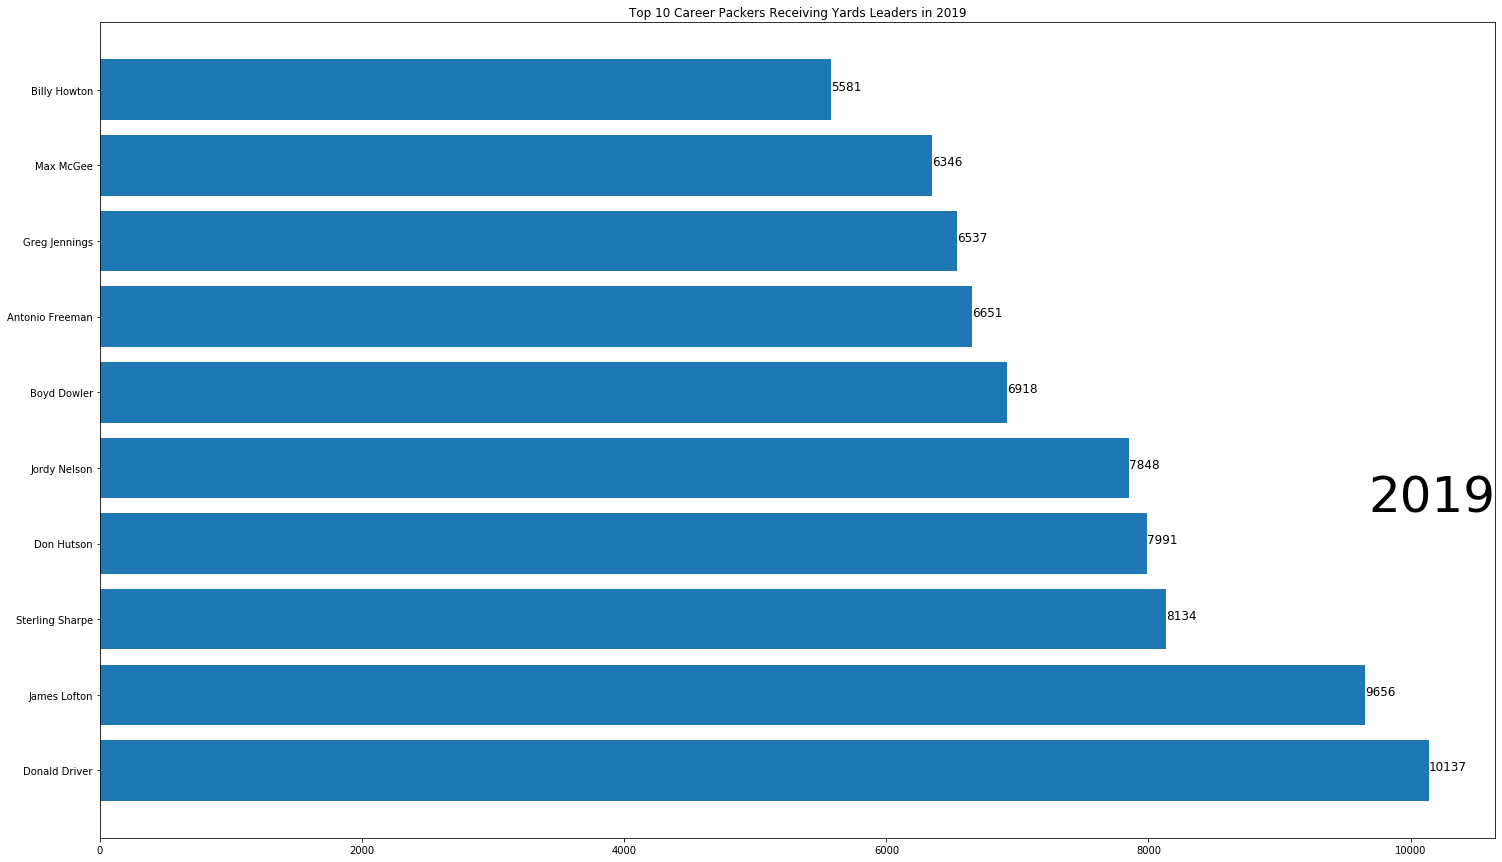

In [9]:
fig, ax = plt.subplots(figsize=(25, 15))
#horizontal bar graph of player and yards
ax.barh(rec_yds_year['Player'], rec_yds_year['Receiving Yards'])
#loop to put text of yards total after the bar
for i, (total, Player) in enumerate(zip(rec_yds_year['Receiving Yards'], rec_yds_year['Player'])):
    ax.text(total, i,   total, ha='left', color = 'black', size = 12)
#Putting a bigger year label on the right of graph to make it more obvious what year the data is showing
ax.text(1, 0.4, year, transform=ax.transAxes, size=50, ha='right')
ax.set_title('Top 10 Career Packers Receiving Yards Leaders in' + ' ' + str(year))

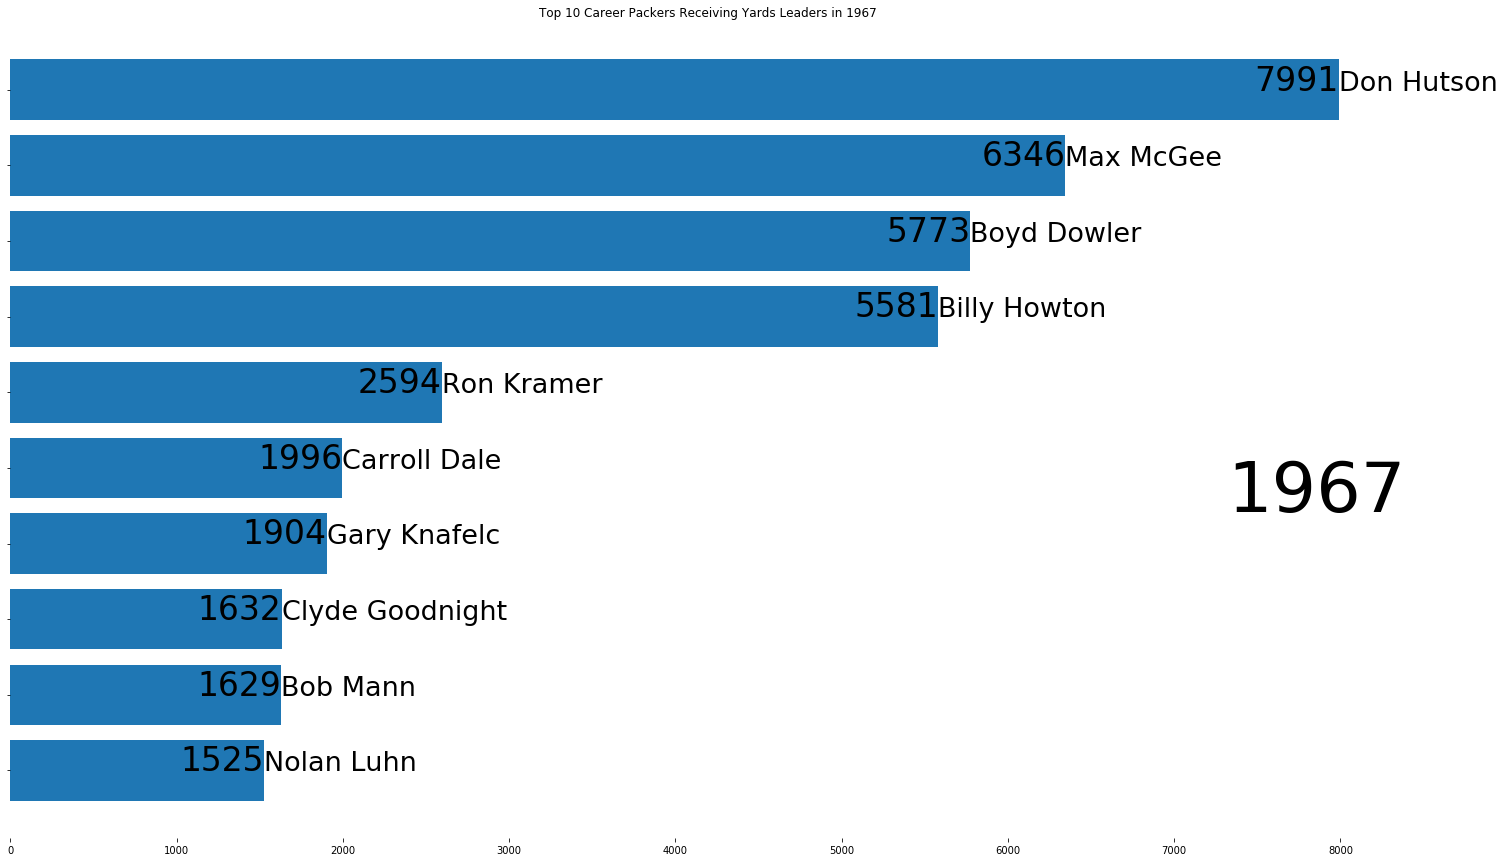

In [10]:
fig, ax = plt.subplots(figsize=(25, 15))
#create function to draw bar chart and pass year variable as argument
def draw_barchart(year):
    rec_yds_year=rec_yds[rec_yds['Year'].eq(year)]
    rec_yds_year = rec_yds_year[::-1]
    ax.clear()
    #horizontal bar graph of player and yards
    ax.barh(rec_yds_year['Player'], rec_yds_year['Receiving Yards'])
    #loop to put text of player after bar and yards in bar
    for i, (total,Player) in enumerate(zip(rec_yds_year['Receiving Yards'], rec_yds_year['Player'])):
        ax.text(total, i,   total, ha='right', color = 'black', size = 33)
        ax.text(total, i,   Player, ha='left', color = 'black', size = 27)
    #Putting a bigger year label on the right of graph to make it more obvious what year the data is showing
    ax.text(1, 0.4, year, transform=ax.transAxes, size=70, ha='right')
    ax.set_title('Top 10 Career Packers Receiving Yards Leaders in' + ' ' + str(year))
     #don't include y axis lables
    ax.set_yticklabels([])
    plt.box(False)
    
#calling function with the year 1967    
draw_barchart(1967)    

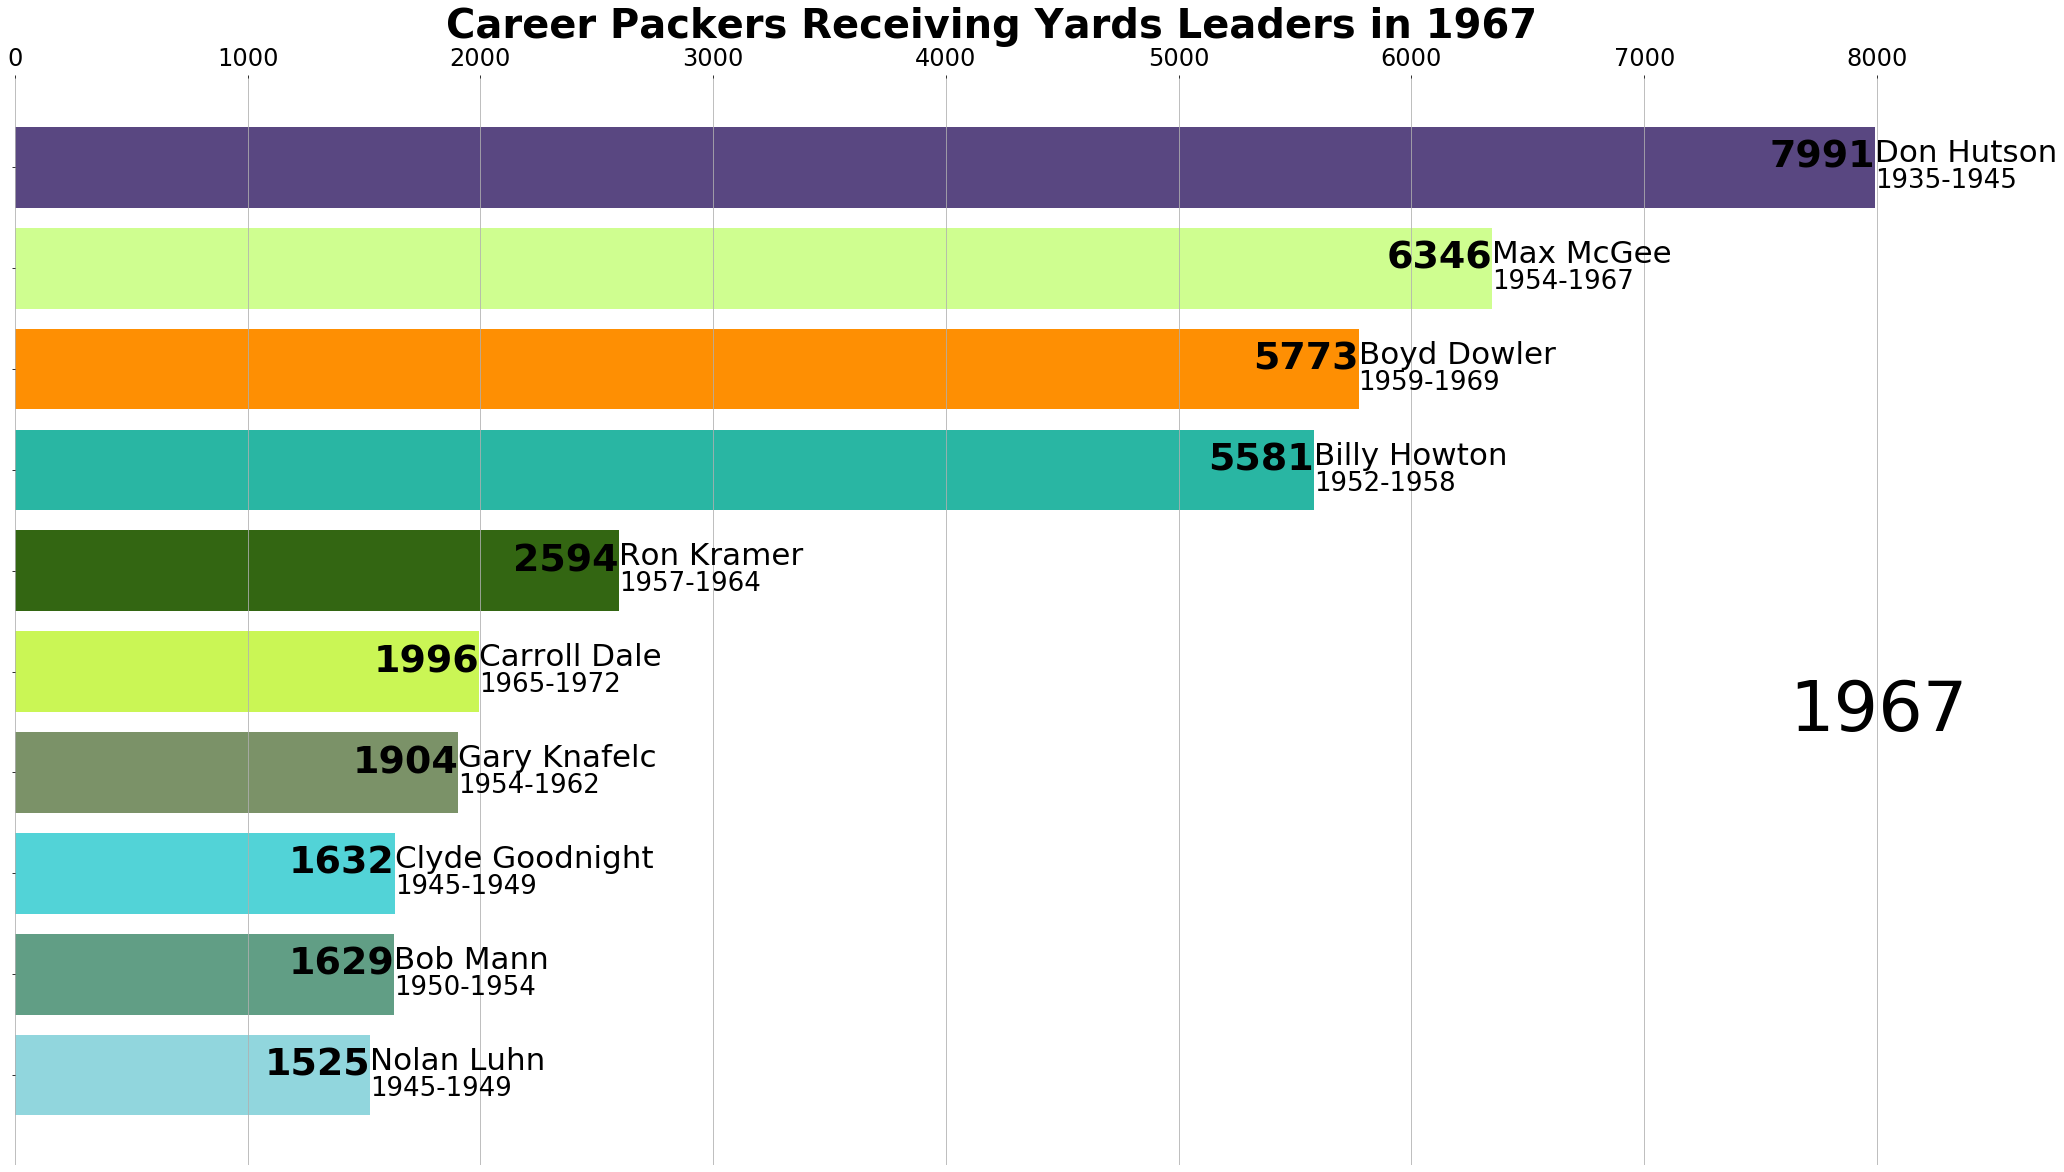

In [11]:
#Code to assign each player a different color and keep them consistent if the years are changed
def transform_color(color, amount = 0.5):
    try:
        c = mc.cnames[color]
    except:
        c = color
        c = colorsys.rgb_to_hls(*mc.to_rgb(c))
    return colorsys.hls_to_rgb(c[0], 1 - amount * (1 - c[1]), c[2])

all_names = rec_yds['Player'].unique().tolist()
random_hex_colors = []
for i in range(len(all_names)):
    random_hex_colors.append('#' + '%06X' % randint(0, 0xFFFFFF))
    
    

rgb_colors = [transform_color(i, 1) for i in random_hex_colors]

#Create figure and call the draw_barchart function
fig, ax = plt.subplots(figsize=(35, 20))
def draw_barchart(year):
    rec_yds_year=rec_yds[rec_yds['Year'].eq(year)]
    rec_yds_year = rec_yds_year[::-1]
    ax.clear()
    
    bar_colors = dict(zip(rec_yds['Player'].unique(), rgb_colors))
    
    ax.barh(rec_yds_year['Player'], rec_yds_year['Receiving Yards'], color = [bar_colors[i] for i in rec_yds_year['Player']])
    #loop to put text of yards after bar and player/years played inside bar
    for i, (total,Player, YearsPlayed) in enumerate(zip(rec_yds_year['Receiving Yards'], rec_yds_year['Player'], rec_yds_year['Years Played'])):
         ax.text(total, i,   total, ha='right', color = 'black', weight=600, size = 38)
         ax.text(total, i,   Player, ha='left', color = 'black', size = 31, va='bottom')
         ax.text(total, i,   YearsPlayed, ha='left', color = 'black', size = 26, va='top')
    #Putting a bigger year label on the right of graph to make it more obvious what year the data is showing
    ax.text(1, 0.4, year, transform=ax.transAxes, size=70, ha='right')
    
    ax.xaxis.set_ticks_position('top')
    
    plt.tick_params(labelsize = 24)
    
    ax.set_title('Career Packers Receiving Yards Leaders in' + ' ' + str(year), size = 40, weight=600)
    ax.set_yticklabels([])
    plt.box(False)
    ax.grid(which='major', axis='x', linestyle='-')
    
#calling function with the year 1967   
draw_barchart(1967)   

In [12]:
#Code to run for animation launch and control - Replacing with a recorded animated gif for ease of visualizing in notebook

#fig, ax = plt.subplots(figsize=(35, 25)) 
#using animation library to call function at regular intervals (speed) controlled by interval amount and selected range(years)
#animator = animation.FuncAnimation(fig, draw_barchart, frames=range(1935, 2020), interval = 1200)
#HTML(animator.to_jshtml()) 
#<img src="Packers_Top_ReceivingYds.gif" align='left' width=900  height=600 />

<img src="Packers_Top_ReceivingYds.gif" align='left' width="900"  height="600" />